In [99]:
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import display, HTML, IFrame
import numpy as np
import plotly.express as px
import plotly.subplots as sp

In [100]:
#CHECKM DATA FROM GALAXY
url_checkm = "https://usegalaxy.eu/api/datasets/26c75dcccb616ac86ea31b43000ed2ed/display?to_ext=tabular"
#CHECKM2 DATA FROM GALAXY
url_checkm2 = "https://usegalaxy.eu/api/datasets/26c75dcccb616ac80f3a06a8ad0904d7/display?to_ext=tabular"

In [101]:
df_checkm = pd.read_csv(url_checkm, sep="\t")

print(df_checkm.columns)
print(df_checkm.shape)

html_checkm = df_checkm.to_html(index=False)

scrollable_html = f'''
<div style="height: 400px; overflow: auto;">
    {html_checkm}
</div>
'''
display(HTML(scrollable_html))

df_checkm2 = pd.read_csv(url_checkm2, sep="\t")

print(df_checkm2.columns)
print(df_checkm2.shape)

html_checkm2 = df_checkm2.to_html(index=False)

scrollable_html = f'''
<div style="height: 400px; overflow: auto;">
    {html_checkm2}
</div>
'''
display(HTML(scrollable_html))

Index(['Bin Id', 'Marker lineage', '# genomes', '# markers', '# marker sets',
       '0', '1', '2', '3', '4', '5+', 'Completeness', 'Contamination',
       'Strain heterogeneity'],
      dtype='object')
(134, 14)


Index(['Name', 'Completeness', 'Contamination', 'Completeness_Model_Used',
       'Translation_Table_Used', 'Coding_Density', 'Contig_N50',
       'Average_Gene_Length', 'Genome_Size', 'GC_Content',
       'Total_Coding_Sequences', 'Total_Contigs', 'Max_Contig_Length',
       'Additional_Notes'],
      dtype='object')
(134, 14)


   Completeness (%)  Contamination (%)
0             98.29               1.99
1             88.35               1.69
2             96.95               1.22
3             92.38               3.20
4             92.59               1.28


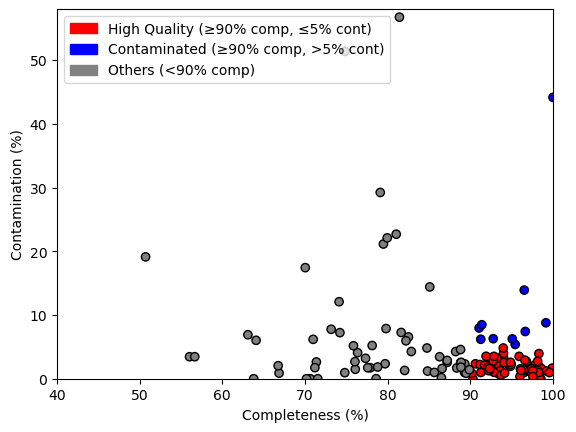

In [102]:
#CONTAMINATION x COMPLETNESS

plot_df = df_checkm.loc[:,['Completeness', 'Contamination']]

plot_df.rename(columns={'Completeness': 'Completeness (%)', 'Contamination': 'Contamination (%)'}, inplace=True)

print(plot_df.head())


completness = 90.0
contamination = 5.0

conditions = [(plot_df['Completeness (%)'] >= completness) & (plot_df['Contamination (%)'] <= contamination), (plot_df['Completeness (%)'] >= completness) & (plot_df['Contamination (%)'] > contamination)]

choices = ['red', 'blue']

colors = np.select(conditions, choices, default='grey')

plt.scatter(x=plot_df['Completeness (%)'], y=plot_df['Contamination (%)'], c=colors, edgecolor='black')

plt.xlim(max(math.floor((plot_df['Completeness (%)'].min() - 10) / 10) * 10 ,0), 100)
plt.ylim(0, min(math.ceil(plot_df['Contamination (%)'].max() + 1), 100))

plt.xlabel("Completeness (%)")
plt.ylabel("Contamination (%)")

legend_patches = [
    mpatches.Patch(color="red", label="High Quality (≥90% comp, ≤5% cont)"),
    mpatches.Patch(color="blue", label="Contaminated (≥90% comp, >5% cont)"),
    mpatches.Patch(color="grey", label="Others (<90% comp)")
]
plt.legend(handles=legend_patches, loc="best")

plt.show()

   N50(kbp)
0    52.200
1    16.112
2    62.436
3     9.080
4    34.002


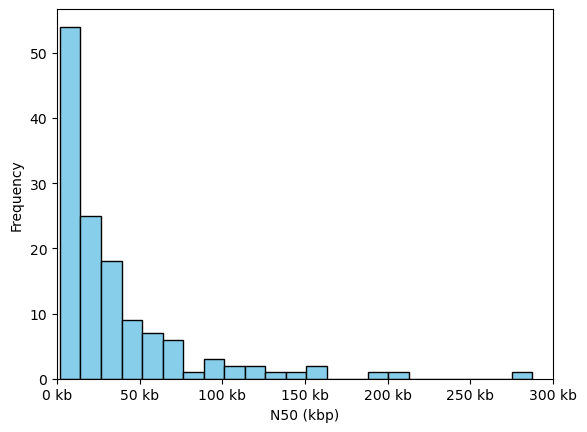

In [103]:
#N50 HISTOGRAM

his_df = df_checkm2.loc[:,['Contig_N50']]

his_df.rename(columns={'Contig_N50': 'N50(kbp)'}, inplace=True)

his_df = his_df / 1000

print(his_df.head())

plt.hist(his_df, bins='auto', color='skyblue', edgecolor='black')

plt.xlim(0, his_df['N50(kbp)'].max())

plt.xlabel('N50 (kbp)')
plt.ylabel('Frequency')

plt.xticks(plt.xticks()[0], [f'{int(x)} kb' for x in plt.xticks()[0]])

plt.show()

   # Contig
0       152
1       328
2        78
3       865
4       176


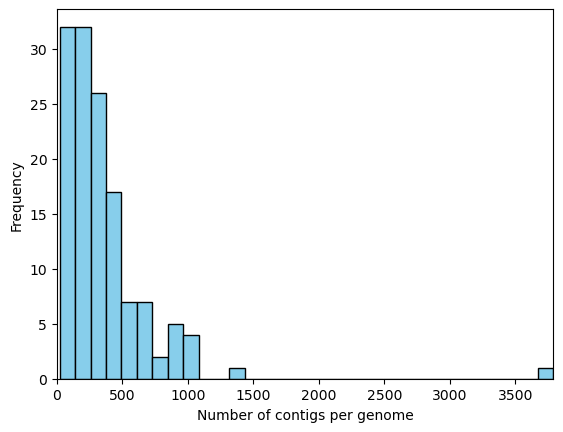

In [104]:
#NUMBER OF CONTIGS HISTOGRAM

his_df = df_checkm2.loc[:,['Total_Contigs']]

his_df.rename(columns={'Total_Contigs': '# Contig'}, inplace=True)

print(his_df.head())

plt.hist(his_df, bins='auto', color='skyblue', edgecolor='black')

plt.xlim(0, his_df['# Contig'].max())

plt.xlabel('Number of contigs per genome')
plt.ylabel('Frequency')

plt.show()

                                   Bin    N50  Total length Assembly  \
0  SRR22878281.fastq_bin_1030637.fasta  52200                4867065   
1  SRR22878281.fastq_bin_1047037.fasta  16112                3654981   
2  SRR22878281.fastq_bin_1048668.fasta  62436                2677092   
3  SRR22878281.fastq_bin_1065179.fasta   9080                5913631   
4  SRR22878281.fastq_bin_1069559.fasta  34002                3943993   

   Longest Contig  Coding Density  
0          183065           0.930  
1           96306           0.887  
2          190839           0.887  
3           38672           0.926  
4           77593           0.935  


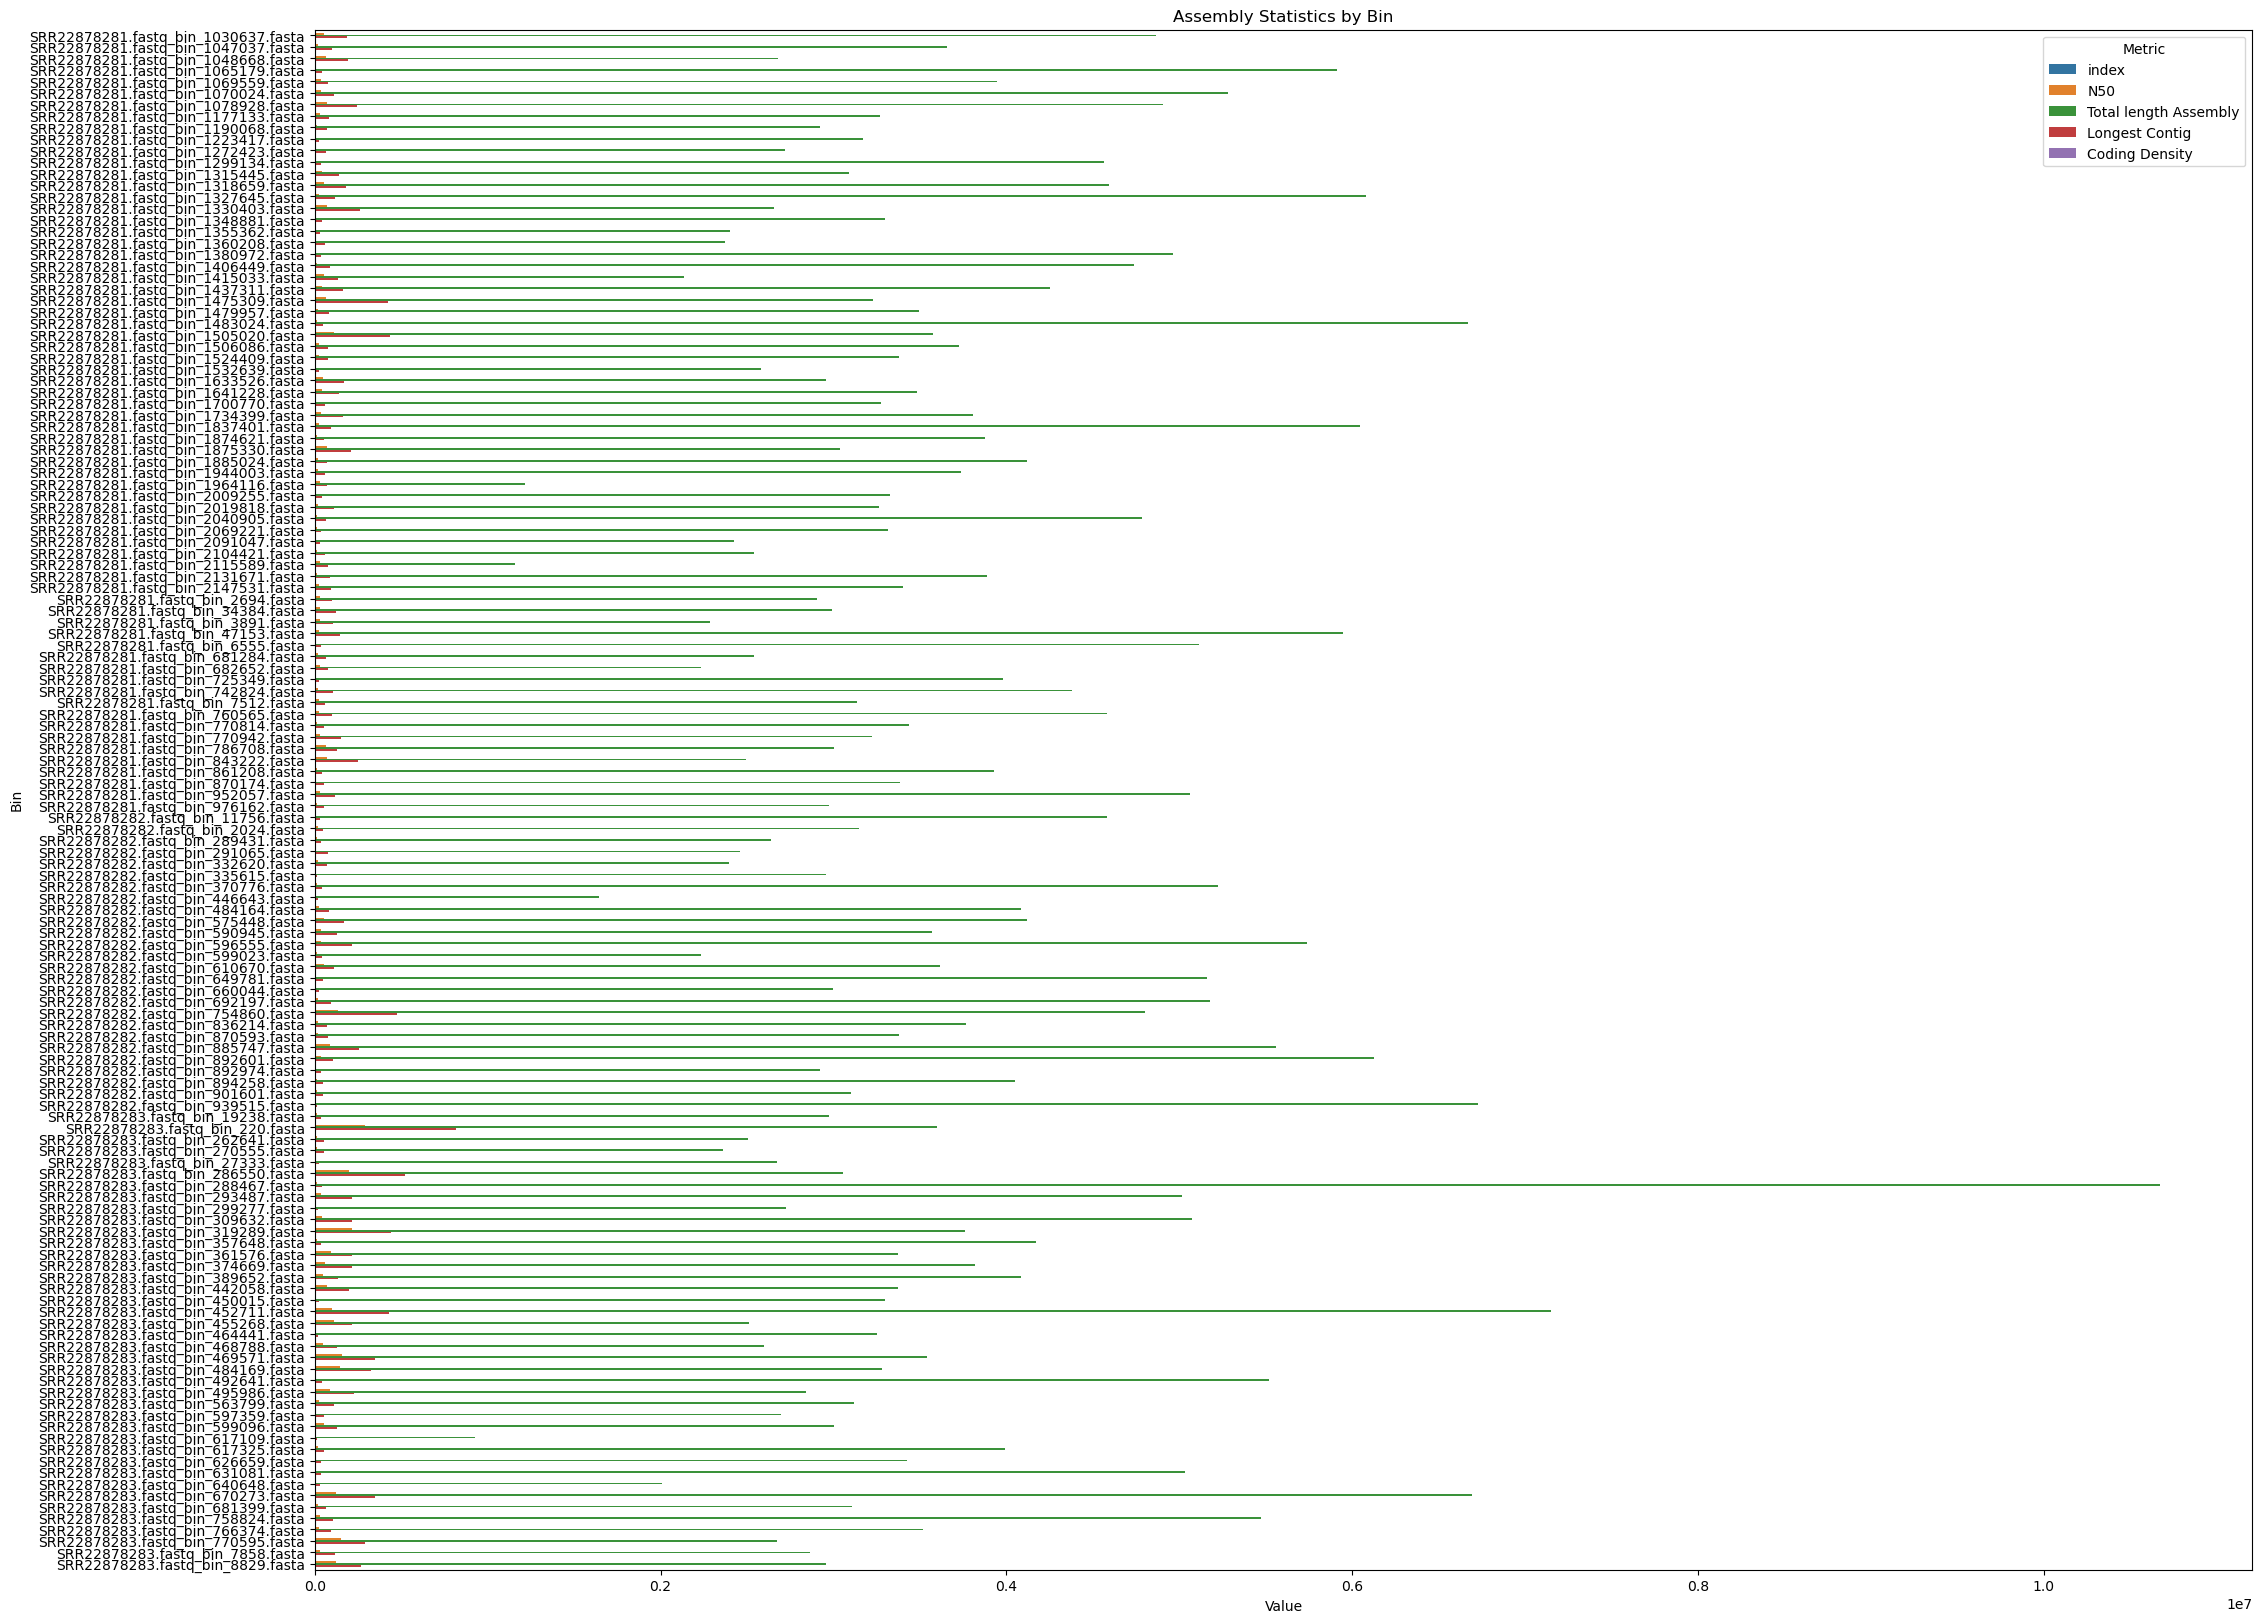

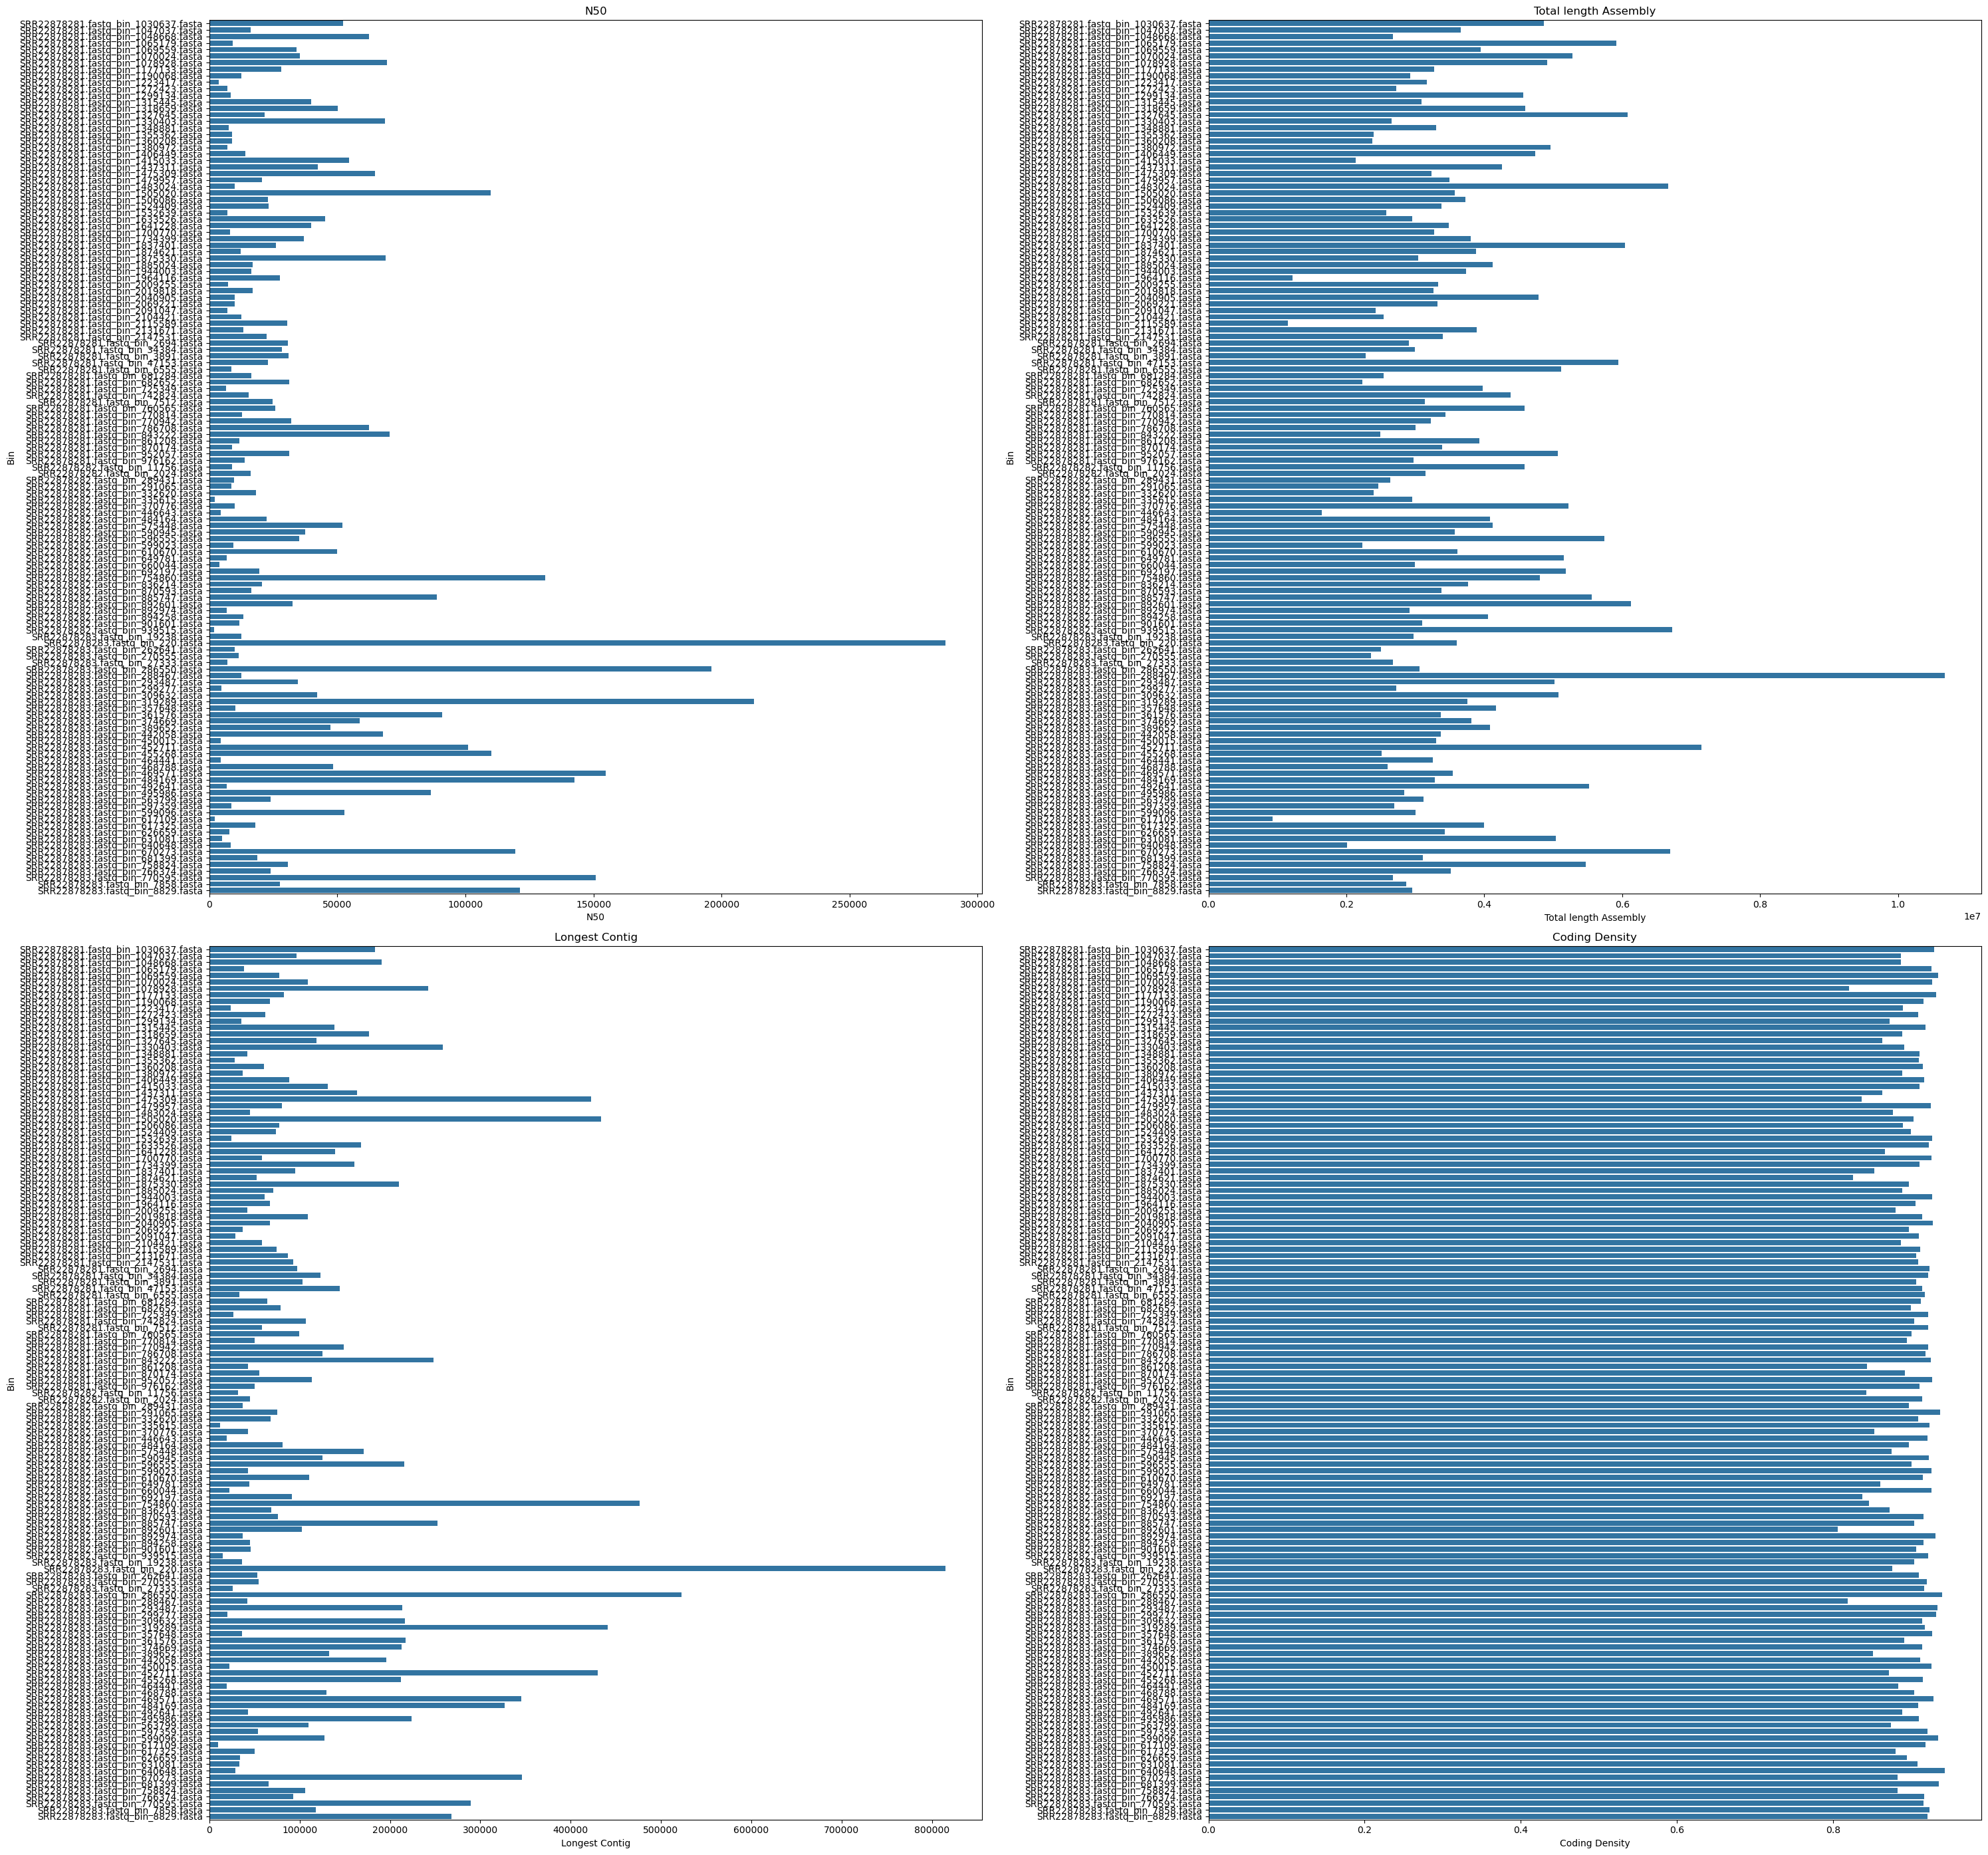

In [ ]:
#N50 VALUES x TOTAL LENGTH OF THE ASSEMLBY x LENGTH OF THE LONGEST CONTIG x CODDING DENSITY

plot_df = df_checkm2.loc[:,['Name', 'Contig_N50', 'Genome_Size', 'Max_Contig_Length', 'Coding_Density']]

plot_df.rename(columns={'Name': 'Bin', 'Genome_Size': 'Total length Assembly', 'Contig_N50' : 'N50', 'Max_Contig_Length': 'Longest Contig', 'Coding_Density': 'Coding Density'}, inplace=True)

print(plot_df.head())

df_melt = plot_df.reset_index().melt(id_vars='Bin', var_name='Metric', value_name='Value')

plt.figure(figsize=(25,20))
sns.barplot(data=df_melt, y='Bin', x='Value', hue='Metric')
plt.title("Assembly Statistics by Bin")
plt.xlabel("Value")
plt.legend(title='Metric')

metrics = ['N50','Total length Assembly','Longest Contig','Coding Density']

fig, axes = plt.subplots(2, 2, figsize=(30,28))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    sns.barplot(data=plot_df, x=metric, y="Bin", ax=axes[i], orient="h")
    axes[i].set_title(metric)
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel('Bin')

plt.tight_layout()
plt.show()

df_norm = plot_df.copy()
df_norm[metrics] = plot_df[metrics].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_melt = df_norm.melt(id_vars="Bin", var_name="Metric", value_name="Value")

fig = px.bar(
    df_melt,
    x="Value",
    y="Bin",
    color="Metric",
    barmode="group",
    orientation="h",
    title="Normalized assembly statistics per bin"
)

fig.update_layout(height=30 * len(plot_df), yaxis=dict(autorange="reversed"))

# 👉 Save to HTML
fig.write_html("assembly_stats_normalized.html")

HTML(fig.to_html())